# Аналитика в авиакомпании

## 1. Импорт и проверка данныx

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import sys

In [108]:
model_flights = pd.read_csv('/datasets/query_1.csv')
city_flights = pd.read_csv('/datasets/query_3.csv')

In [109]:
model_flights.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [110]:
city_flights.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [111]:
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [112]:
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


**ВЫВОД:** Данные корректны. пропускв нет, тип данных правильный.

## 2. Анализ данных

**2.1** Построим график количества рейсов по моделям самолетов.

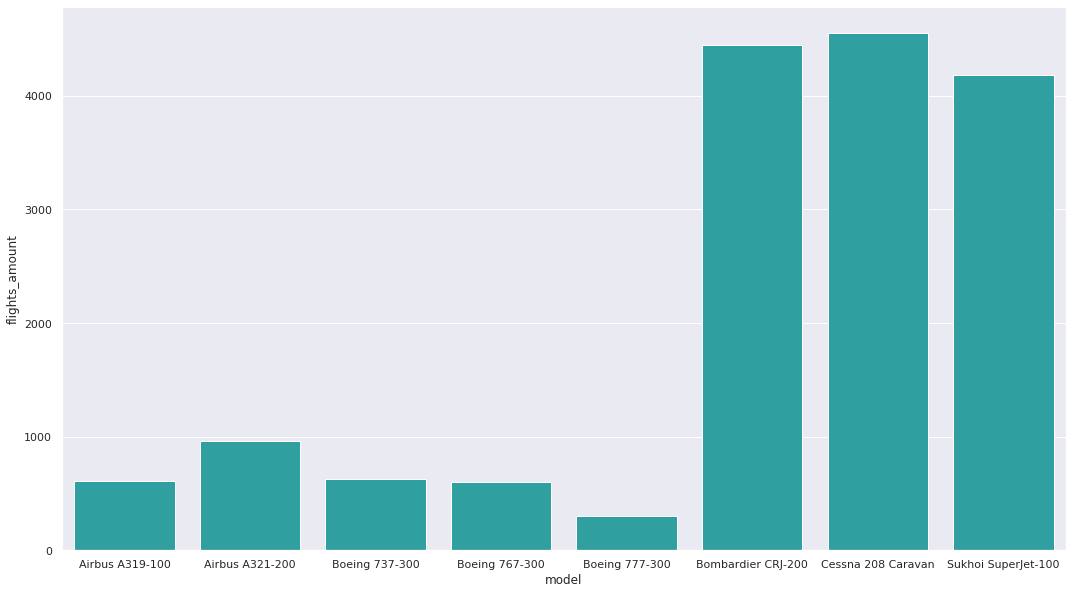

In [113]:
sns.set(rc={'figure.figsize':(18,10)})
ax = sns.barplot(x="model", y="flights_amount", data=model_flights, ci=False, color="#1CB3B1")

**ВЫВОД:** Как видно в лидерах по количеству рейсов  с большим отрывом- "местные" и "региональные" модели самолетов. Это модели **Bombardier CRJ-200**, **Cessna 208 Caravan**,**Sukhoi SuperJet-100**. 

Все логично -во-первых эти типы самолетов летают на небольшое расстояние и поэтому в день делают больше рейсов чем "средне и дальнемагистральные"(оставшиеся модели в нашем списке). Во-вторых - эти самолеты более востребованы на внутренних перевозках в пределах страны. В-третьих (но это точно не известно), количество самолетов разных классов в авиакомпании может быть разным.

**2.2** Построим график среднего количества рейсов по городам.

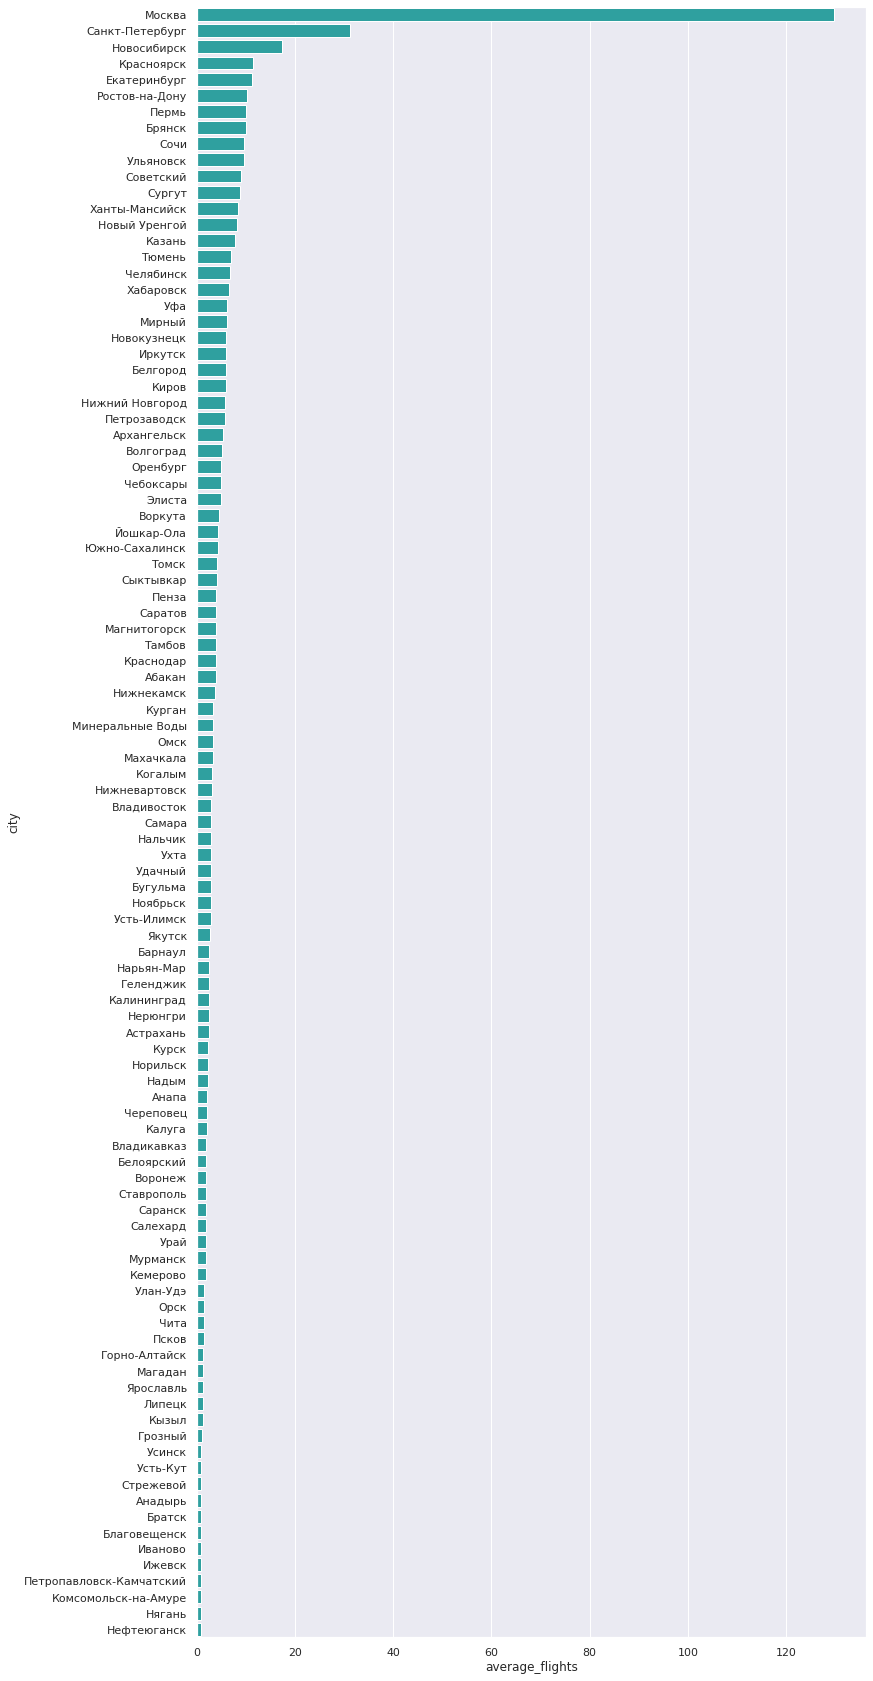

In [114]:
sns.set(rc={'figure.figsize':(12,30)})
ax = sns.barplot(x="average_flights",y="city", data=city_flights_sorted, orient = 'h', ci=False, color="#1CB3B1")

**ВЫВОД:** В беспорных лидерах - г.Москва, как главный транспортный узел нашей страны. Второй - г.Санкт-Петербург но с отставанием по количеству рейсов почти в 4 раза. Далее еще меньше. Немного удивило то что нет четкой зависимости количества рейсов от количества населения города.  Например г.Пермь с населением 250 тыс. входит в топ 10  по кол-ву рейсов. А Нижний новгород - пятый по численности город России только на 27 позиции.

**2.3** Найдем топ 10 городов по количеству рейсов и выведем данные по среднему кол-ву рейсов в виде круговой диаграммы.

In [115]:
city_flights_sorted = city_flights.sort_values(by = 'average_flights', ascending = False).reset_index(drop = True)

top10_city_flights = city_flights_sorted .loc[:9]

top10_city_flights

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


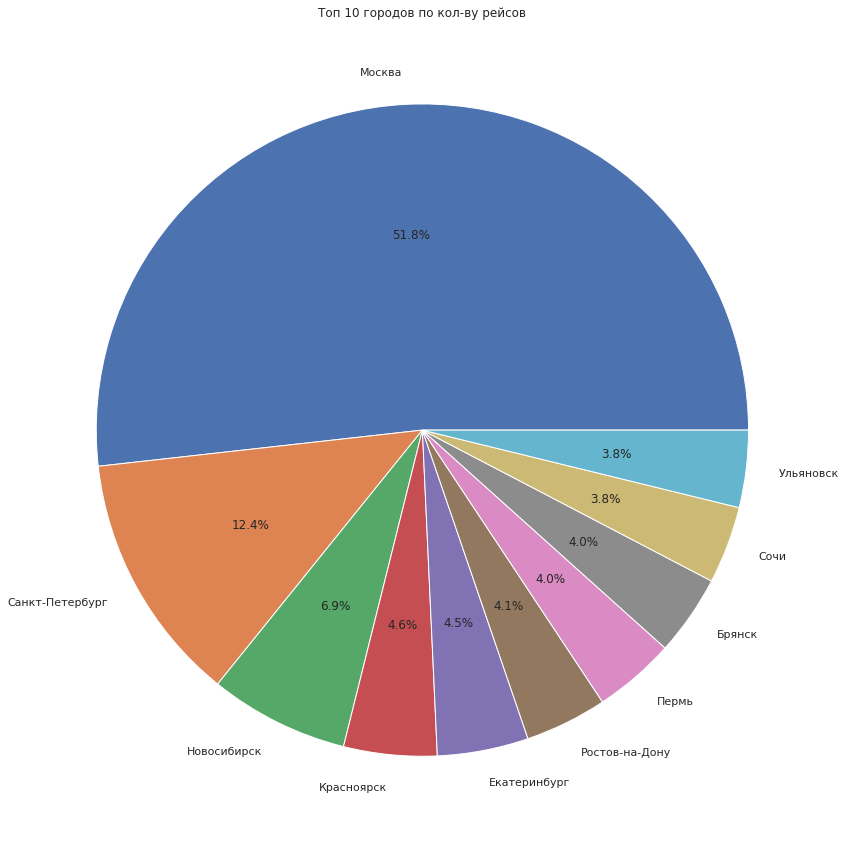

In [116]:
fig1, ax = plt.subplots(figsize=(15, 15))
ax.pie(top10_city_flights['average_flights'], labels=top10_city_flights['city'], autopct='%1.1f%%')
ax.set_title("Топ 10 городов по кол-ву рейсов")
plt.show()

**ВЫВОД:** Как отмечалось ранее в лидерах г.Москва. Более того среднее количество рейсов г. Москва, больше чем сумма остальных городов из топ.10

## 3. Проверка гипотез

**3.1** Сохраним данные для проверки гипотез в переменной **festival**. Посмотрим на них.

In [117]:
festival = pd.read_csv('/datasets/query_last.csv')
festival

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [118]:
festival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


**ВЫВОД:** Данные корректны. Имеющиеся пропуски логичны. тип данных правильный.

**3.2** Сформируем гипотезы. 

С учетом того, что нулевая гипотеза должна использовать знак равенства имеем:

Н0: средний спрос на билеты в дни проведения фестивалей равен среднему спросу в дни без проведения фестивалей.

Н1: средний спрос на билеты в дни проведения фестивалей равен среднему спросу в дни без проведения фестивалей.

Для проверки гипотез - сформируем две выборки. В превой выборке оставим только недели с фестивалями (weeks_with_festival). Во второй - оставим только недели без фестивалей (weeks_without_festival).

In [119]:
weeks_with_festival = festival.dropna()['ticket_amount']
weeks_with_festival 

0    43568
1    51034
6    51386
Name: ticket_amount, dtype: int64

In [120]:
weeks_without_festival = festival[festival['festival_name'].isna()]['ticket_amount']
weeks_without_festival

2    51675
3    51378
4    51492
5    51360
7    51670
8    51518
9    51623
Name: ticket_amount, dtype: int64

Проверим гипотезу H0. 

Так как дисперсии в генеральных совокупностях неизвестны, поставим параметр **equal_var = False**. 

Критический уровень статистической значимости поставим **5%**, чтобы увереннее говорить о возможном различии

In [121]:
alpha = 0.05

results = st.ttest_ind(
    weeks_with_festival, 
   weeks_without_festival,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не можем отвергнуть нулевую гипотезу')

p-значение: 0.377432493172683
Не можем отвергнуть нулевую гипотезу


**ВЫВОД:** Похоже на то что средний спрос на билеты за неделю не зависит от проведения на неделе фестиваля.

# Общий вывод

Пассажиропоток в г.Москва огромен, по сравнению с остальными городами. Однако среднее количество рейсов а значит и пассажиропоток в г. Москва не зависят от таких мероприятий как - фестиваль. Видимо процент пассажиров, летящих данной авиакомпанией, на фестиваль - невелик, по сравнению со средним количеством пассажиров летающих в Москву каждый день. Можно предположить что те же выводы будут и для других городов с большим пассажиропотоком. Для городов с маленьким пассажиропотоком все не так очевидно (нужны исследования выборок по другим городам).